In [144]:
using Pkg; Pkg.activate("..")
using KM3io
using RainbowAlga
using GLMakie
using ColorSchemes

  Activating project at `~/Dev/RainbowAlga.jl`


In [204]:
function basegrid!(scene; center=(0, 0, 0), span=(-500, 500), spacing=50, linewidth=1, color=:grey)
    min, max = span
    center = Point3f(center)
    for q ∈ range(min, max; step=50)
        lines!(scene, [Point3f(q, min, 0) - center, Point3f(q, max, 0) - center], color=color, linewidth=linewidth)
        lines!(scene, [Point3f(min, q, 0) - center, Point3f(max, q, 0) - center], color=color, linewidth=linewidth)
    end
    scene
end

basegrid! (generic function with 1 method)

In [211]:
f = ROOTFile("/Volumes/Hispeed/Experiments/KM3NeT/ARCA21v8.1/mcv8.1.gsg_numu-CCHEDIS_1e2-1e8GeV.sirene.jterbr00013288.1.root")
det = Detector("/Volumes/Hispeed/Experiments/KM3NeT/ARCA21v8.1/KM3NeT_00000133_20221025.detx")
det_center = center(det)
cmap = ColorSchemes.hawaii

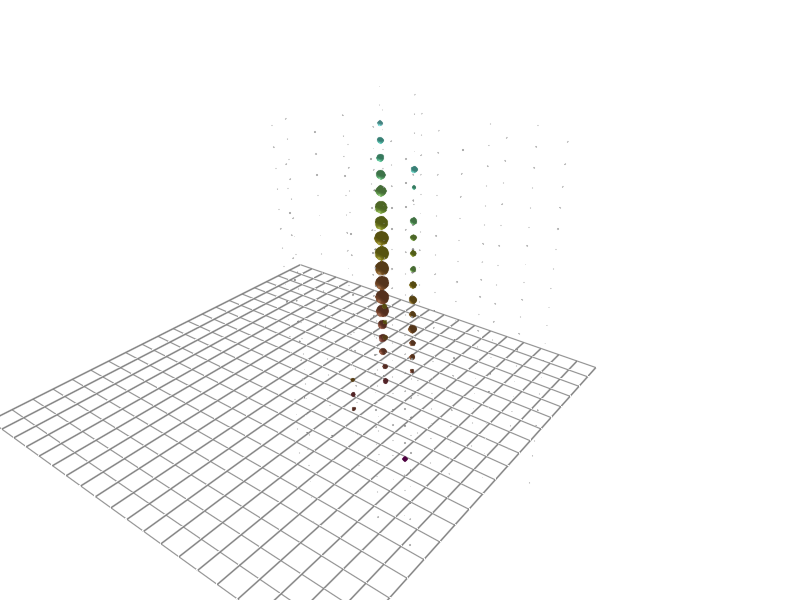

In [214]:
event = f.online.events[19]
chits = calibrate(det, event.triggered_hits);

t_min, t_max = extrema(h.t for h ∈ chits)
Δt = t_max - t_min

scene = Scene(backgroundcolor=:white)

for m ∈ det
    mesh!(scene, Sphere(Point3f(m.pos), 1.5), color=:white)
end
    
for hit ∈ chits
    color = (hit.t - t_min) / Δt
    mesh!(scene, Sphere(Point3f(hit.pos), √hit.tot), color=cmap[color])
end

basegrid!(scene)

cam = Makie.camera(scene)
w, h = size(scene)
nearplane = 1f0
farplane = 100000f0
aspect = Float32(w / h)
cam.projection[] = Makie.perspectiveprojection(45f0, aspect, nearplane, farplane)
eyeposition = Vec3f(1000)
lookat = Vec3f(det_center[1], det_center[2], det_center[3])
upvector = Vec3f(0, 0, 1)
cam.view[] = Makie.lookat(eyeposition, lookat, upvector)
scene

In [220]:
cam = cam3d!(scene; far=10000)

Camera3D(Observable(Float32[3.0, 3.0, 3.0]), Observable(Float32[0.0, 0.0, 0.0]), Observable(Float32[0.0, 0.0, 1.0]), Observable(1.0f0), Observable(45.0f0), Observable(0.1f0), Observable(10000.0f0), Observable(-1.0), Attributes with 40 entries:
  backward_key => s
  cad => false
  circular_rotation => (true, true, true)
  contract_view_key => page_down
  down_key => f
  far => 10000
  fix_x_key => x
  fix_y_key => y
  fix_z_key => z
  fixed_axis => true
  forward_key => w
  fov => 45.0
  keyboard_rotationspeed => 1.0
  keyboard_translationspeed => 0.5
  keyboard_zoomspeed => 1.0
  left_key => a
  mouse_rotationspeed => 1.0
  mouse_translationspeed => 1.0
  mouse_zoomspeed => 1.0
  near => Automatic()
  pan_left_key => j
  pan_right_key => l
  projectiontype => Perspective
  reset => home
  right_key => d
  roll_clockwise_key => e
  roll_counterclockwise_key => q
  rotation_button => left
  rotation_center => lookat
  scroll_mod => true
  selected => true
  stretch_view_key => page_up
  

In [77]:
r = Rect2f(-1, -1, 2, 2)

GeometryBasics.HyperRectangle{2, Float32}(Float32[-1.0, -1.0], Float32[2.0, 2.0])

2-element Vec{2, Float32} with indices SOneTo(2):
 2.0
 2.0